<a href="https://colab.research.google.com/github/RifqiHafizuddin/Computational-Intelligence-week3/blob/main/TaskWeek6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Rifqi Hafizuddin

NPM: 2106638204

Original: https://www.kaggle.com/code/payamamanat/bi-directional-lstm

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'glove6b300dtxt:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5504%2F8240%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241013%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241013T140520Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D0beddaa2fc7c742a934153dcb2a595bdc84ce994756c9043cfdaa2126f7786c3afb8603c587c7c23ffcc2246c37611a8bcc100256a017875933ea96dabb5927d942594bfbbe5e6ae5dc392a1832435ca28d4cf48aa146efd989d4bb5f85e218972bc4cca6f628a4d391ca6fc743fcee5d690f4b61a6ef179c54c7ab58813bc231ff6dca901214780da6763c43fb441b75fd37c473f279045ecba3de5213fa29b5d6b2d75bff936ee05330f6ed37d29f80710a450604e2bb8228c58809610f061c1174b19763885efe83a5915645fe20d0f2d88a33ca57f31b2e5897bfde020b3533ded1078c959c6e8c69ba16e0c64ea0f3729c87797b5d2723d016c3ea9f23e,twitter-entity-sentiment-analysis:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1520310%2F2510329%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241013%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241013T140520Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D50de7ebf3dfa6f0d9a3413c3cbe0f76aae35d7622cd90705da326d8e1bb40693115dceb5b1aef348c0cfe903d1708c42d7e3bfd0739b854eac1b5a8090eebbe6eaaa81e41406a2fe135d4366e199ac2ff727e884a256a53e4ce250be1d3191fa2ebca6ab0fc6efc97dd41d5dd74bb860bc3432cb593f356d1ebd58ad8e578922a8ad7cd524c38c8e39796aaf3bf459594e9dd96cf125bbf097e0be5900c87b2780f4d6f15f82ff0ebd72c16f51eb6c04c315a51660de92d488abf6a535c4d6227af253282a1c85d869b06fe6887e96161148114451ac1c82d0a7bdfeb80ad47764eaba7b29a130fc0aa6e534aaae692f9acef480d85a1d159a2e6a0ce89e31c7'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 404848122 bytes downloaded
Downloaded and uncompressed: glove6b300dtxt
[==================================================] 2090169 bytes downloaded
Downloaded and uncompressed: twitter-entity-sentiment-analysis
Data source import complete.


<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Twitter (Text classification) </b></div>

<center>
<img src="https://ai-marketplace.orange-business.com/r/img/Twitter_Sentiment_Analysis.png" width=800 height=500 />
</center>

<div style="border-radius:10px;border:black solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
<div style="font-family:Georgia;background-color:'#DEB887'; padding:30px; font-size:17px">

   

<h3 align="left"><font color=purple>📝 Project Description:</font></h3><br>

Dataset : The dataset is a combination of  74,681 views from different people in Twitter media which includes 4 columns<br>

1-Index : which indicates a number for each sample (not important)<br>
2-Borderlands : which indicates a number of areas  for each sample <br>
3-Mode : The feeling of that person about the text which has shared<br>
4-Text : The texture that view that person has shared.<br>

Note:In the dataset , columns have wrong names. The names I mentioned above were right <br>

Goals: The goal of this notebook is : <br>
1-Importing necessary libraries<br>
2-Quick scan of dataset<br>
3-EDA(Explatory Data Analysis)<br>
4-Data cleaning for text<br>
5-Introducing a number of methods in NLP:<br>
CounterVectorizer <br>
TF-IDF <br>
N-Grams <br>
POS(Part Of Speech)<br>
NER(Named Entity Recognition)<br>
Stopwords <br>
Lemmas and Stems<br>
Tokenization<br>
Showing common used words and punctuations <br>
Wordcloud illustration <br>

6-Preparing dataset  by Pytorch and Keras libraries <br>
7-Using Bi-directional LSTM to classify the texts<br>

Where we can use of text classification ?Why we use ?<br>
Actually, there are varous places which we are able to use of text classification ,but, most importantly<br>
in social apps such as Twitter , Instegram ...  and different websites etc ... to avoid sharing inappropriate reviws , discrimination and ... .

How we can make better acuracy ?<br>
There are vatious ways but the best way increasing more data instead 75K

<br> </div>

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Importing Libraries</b></div>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import warnings
import re
import string
import random


from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer , TweetTokenizer
from nltk.stem import WordNetLemmatizer ,PorterStemmer
from nltk.corpus import stopwords
from collections import defaultdict
from collections import Counter
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import tensorflow as tf

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


nlp = spacy.load("en_core_web_sm")
warnings.filterwarnings('ignore')

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Description**<br>
* First we load the dataset and show 7 random samples of it<br>

</div>

In [ ]:
df = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv')

In [ ]:
df.sample(7)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
68967,3811,Cyberpunk2077,Positive,Also Soooooo Very Excited!!!!
44517,11646,Verizon,Negative,Now @Verizon your 5G thing is going not fast t...
7443,9279,Overwatch,Neutral,Where WTF is this
4361,1951,CallOfDutyBlackopsColdWar,Positive,Can't wait to lick the Gipper's boots with my ...
8018,9377,Overwatch,Positive,You’re beautiful and powerful woman.
41803,1573,Battlefield,Neutral,"At the same time, despite the fact that there ..."
128,2422,Borderlands,Irrelevant,Loving these new @GhostLifestyle cans!! Anyone...


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Description**<br>
* Then , a qucik view of shape , names of columns and types of dataset : <br>
shape is : 74681 rows and 4 columns <br>
Name of columns are not good and must be changed<br>
types of columns are in the right situation.

</div>

In [ ]:
print(f'The shape of the dataset is : {df.shape}')

The shape of the dataset is : (74681, 4)


In [ ]:
print(f'The columns are :{df.columns}')

The columns are :Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


In [ ]:
print(f'The dtypes of the dataset : \n\n{df.dtypes}')

The dtypes of the dataset : 

2401                                                      int64
Borderlands                                              object
Positive                                                 object
im getting on borderlands and i will murder you all ,    object
dtype: object


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Description**<br>
* In a quick review we can observe basic information <br>
* But we are going to create a function to show of more details such as<br>
Volume of null values and its percentage , Volume of duplicated and percentage of duplicated values

</div>

In [ ]:
df.describe(include='all')

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
count,74681.000000,74681,74681,73995
unique,NaN,32,4,69490
top,NaN,TomClancysRainbowSix,Negative,
freq,NaN,2400,22542,172
mean,6432.640149,NaN,NaN,NaN
std,3740.423819,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3195.000000,NaN,NaN,NaN
50%,6422.000000,NaN,NaN,NaN
75%,9601.000000,NaN,NaN,NaN


<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> EDA</b></div>

In [ ]:
def show_details(dataset):
    missed_values = dataset.isnull().sum()
    missed_values_percent = (dataset.isnull().sum()) / len(dataset)
    duplicated_values = dataset.duplicated().sum()
    duplicated_values_percent = (dataset.duplicated().sum()) / len(dataset)
    info_frame = pd.DataFrame({'Missed_Values' : missed_values ,
                              'Missed_Values %' :missed_values_percent,
                              'Duplicated values' :duplicated_values,
                              'Duplicated values %':duplicated_values_percent})
    return info_frame.T

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Description**<br>
* We can see that very small number of data are missed and duplicated which can easily be dropped.

</div>

In [ ]:
show_details(df)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
Missed_Values,0.000000,0.000000,0.000000,686.000000
Missed_Values %,0.000000,0.000000,0.000000,0.009186
Duplicated values,2700.000000,2700.000000,2700.000000,2700.000000
Duplicated values %,0.036154,0.036154,0.036154,0.036154


In [ ]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
show_details(df)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
Missed_Values,0.0,0.0,0.0,0.0
Missed_Values %,0.0,0.0,0.0,0.0
Duplicated values,0.0,0.0,0.0,0.0
Duplicated values %,0.0,0.0,0.0,0.0


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Description**<br>
* Here we change the name of columns to  appropriate names:<br>
'2401' : 'Index' , 'Borderlands': 'Land' , 'Positive' : 'Mode' , "im getting on borderlands and i will murder you all ,": 'Text'

</div>

In [ ]:
df.rename(columns={'2401' : 'Index' , 'Borderlands': 'Land' , 'Positive' : 'Mode'
                   , "im getting on borderlands and i will murder you all ,": 'Text'}, inplace=True)

In [ ]:
df.columns

Index(['Index', 'Land', 'Mode', 'Text'], dtype='object')

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Description**<br>
* Here , we check Lands column , the number of unique values which is 32  and its names
* And  show the number of each values by dataframe and a Barchart
</div>

In [ ]:
print(f'The number of unique lands : {len(df.Land.unique())}')
print('**' * 40)
df.Land.unique()

The number of unique lands : 32
********************************************************************************


array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [ ]:
lands =df.Land.value_counts()
lands.to_frame()

,count
Land,
TomClancysRainbowSix,2328
Verizon,2319
MaddenNFL,2315
CallOfDuty,2314
Microsoft,2304
WorldOfCraft,2300
NBA2K,2299
LeagueOfLegends,2296
TomClancysGhostRecon,2291


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Description**<br>
* We can see that distribution is quite the same for each area .<br>
* between the range 2150 to 2328 changeably
* Now we just show 10 of the hihest ones
</div>

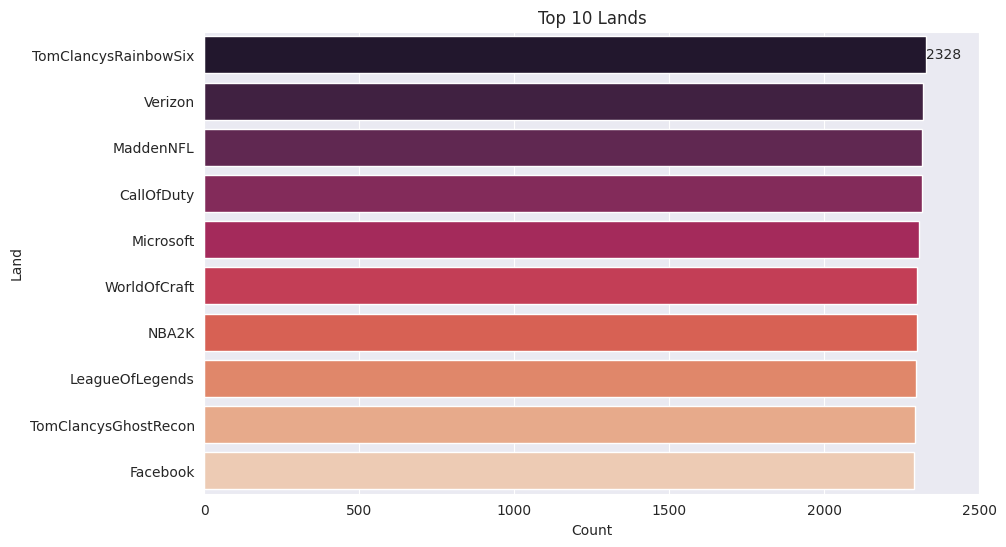

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
bar = sns.barplot(x=lands.values[:10] ,y=lands.index[:10] , palette='rocket')
bar.bar_label(bar.containers[0])
plt.title('Top 10 Lands')
plt.xlabel('Count')
plt.ylabel('Land')
plt.xlim(0 , 2500)
plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Description**<br>
* column Mode , which consists of 4 modes as  : Positive ,Neutral ,Negative and Irrelevant<br>
Negative with highest common reviws : 21698 <br>
Positive the second : 19712<br>
Neutral the third : 17708<br>
Irrelevant : 12537<br>
* Lets depict the values by a pie chart
</div>

In [ ]:
print(f'The unique values of Mode : {len(df.Mode.unique())}')
print('**' * 20)
print(df.Mode.unique())

The unique values of Mode : 4
****************************************
['Positive' 'Neutral' 'Negative' 'Irrelevant']


In [ ]:
mode = df.Mode.value_counts()
mode.to_frame().T

Mode,Negative,Positive,Neutral,Irrelevant
count,21698,19712,17708,12537


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Description**<br>

Negative : 30.3 % <br>
Positive : 27.5%<br>
Neutral : 24.7%<br>
Irrelevant : 17.5%<br>

</div>

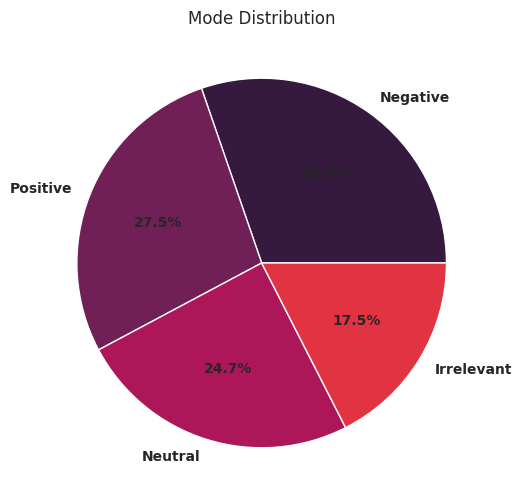

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(x = mode.values , labels=mode.keys() ,autopct="%1.1f%%" ,
textprops={"fontsize":10,"fontweight":"black"},colors=sns.color_palette("rocket"))
plt.title('Mode Distribution')
plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Description**<br>
* we can also take a look at each land with its mode and scan them : <br>

Irrelevant : Battlefield  has highest with 907 , TomClancysGhostRecon with 92 Lowest<br>

Negative :   MaddenNFL  has highest with 1665 , RedDeadRedemption(RDR) with 290 Lowest<br>

Neutral :    Amazon  has highest with 1197 , AssassinsCreed with 153 Lowest<br>

Positive :   AssassinsCreed  has highest with 1382 , Facebook	 with 154 Lowest<br>


</div>

In [ ]:
pd.crosstab(df.Mode , df.Land).T.style.background_gradient( subset=['Negative'],cmap='Reds')\
.background_gradient(subset=['Positive'] , cmap='Greens')\
.background_gradient(subset=['Irrelevant'] , cmap='BuGn')


Mode,Irrelevant,Negative,Neutral,Positive
Land,,,,
Amazon,185,565,1197,302
ApexLegends,185,574,913,606
AssassinsCreed,256,365,153,1382
Battlefield,907,445,342,561
Borderlands,238,415,581,971
CS-GO,620,335,523,717
CallOfDuty,660,861,367,426
CallOfDutyBlackopsColdWar,545,540,340,817
Cyberpunk2077,457,360,456,902


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Description**<br>
* Here with re library we can replace a number of grammatically problems , verbal expressions , ... <br>
* However we can deal with various emojis which are used from people to show off their emotion about the post(replace or delete them) <br>
* Needless to say , emojis can play important role in determining the class in the views<br>
* in the last part of text_clear function we have replaced more than 1 punctuations(those we have allowed to be) to just 1<br>
* Finally , all texts become lower mode and instead more than 1 space be just 1 space<br>

</div>

In [ ]:
def clean_emoji(tx):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols
                           u"\U0001F680-\U0001F6FF"  # transport
                           u"\U0001F1E0-\U0001F1FF"  # flags
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

    return emoji_pattern.sub(r'', tx)
def text_cleaner(tx):

    text = re.sub(r"won\'t", "would not", tx)
    text = re.sub(r"im", "i am", tx)
    text = re.sub(r"Im", "I am", tx)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"don\'t", "do not", text)
    text = re.sub(r"shouldn\'t", "should not", text)
    text = re.sub(r"needn\'t", "need not", text)
    text = re.sub(r"hasn\'t", "has not", text)
    text = re.sub(r"haven\'t", "have not", text)
    text = re.sub(r"weren\'t", "were not", text)
    text = re.sub(r"mightn\'t", "might not", text)
    text = re.sub(r"didn\'t", "did not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'[^a-zA-Z0-9\!\?\.\@]',' ' , text)
    text = re.sub(r'[!]+' , '!' , text)
    text = re.sub(r'[?]+' , '?' , text)
    text = re.sub(r'[.]+' , '.' , text)
    text = re.sub(r'[@]+' , '@' , text)
    text = re.sub(r'unk' , ' ' , text)
    text = re.sub('\n', '', text)
    text = text.lower()
    text = re.sub(r'[ ]+' , ' ' , text)

    return text


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Description**<br>
* Now , before replacing all dataset , I want to go through a copule of common methods which are familiar in NLP<br>
for that I need to have a random example from dataset which I am using of random.choice to get one sample and clean with the function<br>

</div>

In [ ]:
random.seed(99)
test_text =text_cleaner( random.choice(df['Text']))
test_text = clean_emoji(test_text)
test_text

'ghost of tsushima is now graphically the best open world. red dead redemption 2 is one second ahead.'

POS => Part Of Speech

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**POS:**<br>

POS or Part Of Speech ,  the part of speech indicates how the word functions in meaning as well as grammatically within the sentence.<br>
There are 8 parts in English (noun, pronoun, verb, adjective, adverb, preposition, conjunction, and interjection)<br>
Understanding parts of speech is essential for determining the correct definition of a word when using the dictionary.


**Description**<br>
with using of Spacy library and its amazing features (nlp = spacy.load("en_core_web_sm")) which is used for English language<br>
I am going to show you POS in the particular sample <br>

</div>

In [ ]:
doc = nlp(test_text)
for token in doc :
    print(f'{token} => {token.pos_}')

ghost => NOUN
of => ADP
tsushima => PROPN
is => AUX
now => ADV
graphically => ADV
the => DET
best => ADV
open => ADJ
world => NOUN
. => PUNCT
red => ADJ
dead => ADJ
redemption => NOUN
2 => NUM
is => AUX
one => NUM
second => ADJ
ahead => ADV
. => PUNCT


Named Entity Recognition

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**NER:**<br>


NER or Named Entity Recognition , identifies, categorizes and extracts(named entities in text) the most important pieces of information from<br> unstructured text without
requiring time-consuming human analysis. It's particularly useful for quickly extracting key information from large <br>amounts of data because it
automates the extraction process<br>
Furthermore , Named entities are specific terms that represent real-world objects, such as people, organizations, locations, and dates.


**Description**<br>
like the previous exmple and spacy library features Im showing NER on our sample <br>

</div>

In [ ]:
doc = nlp(test_text)
for chunk in doc.ents:
    print(f'{chunk} => {chunk.label_}')


tsushima => GPE
2 => CARDINAL
second => ORDINAL


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Chunking:**<br>
Converting a text to a smaller peices for having better undrestanding or the process of grouping similar words together based on <br>the nature of the word.<br>
Noun Groups, Verbs, verb groups, etc. <br>

NP stands for : Noun Chunks<br>
VP : Verp Chunks
</div>

In [ ]:
doc = nlp(test_text)
for chunk in doc.noun_chunks:
    print(f'{chunk} => {chunk.label_}')

ghost => NP
tsushima => NP
the best open world => NP
red dead redemption => NP


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Tokenization :**<br>

Tokenization is breaking text into smaller parts for easier machine analysis, helping machines understand human language.<br>
These smaller parts known as tokens <br>

Note : <br>
There are various types of tokenizations such as : RegexpTokenizaton , TweetTokenization and etc...<br>
which each one has different method for breaking a text into tokens <br>

**Description**<br>
Here we are using Regexp tokenization which splits a string into substrings using a regular expression. base on space<br>

</div>

In [ ]:
# Tokenizer = TweetTokenizer()
Tokenizer=RegexpTokenizer(r'\w+')
test_text_tokenized = Tokenizer.tokenize(test_text)
test_text_tokenized

# df['Text']=df['Text'].apply(lambda x : Tokenizer.tokenize(x))

['ghost',
 'of',
 'tsushima',
 'is',
 'now',
 'graphically',
 'the',
 'best',
 'open',
 'world',
 'red',
 'dead',
 'redemption',
 '2',
 'is',
 'one',
 'second',
 'ahead']

 Counter vectorizer

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**CountVectorizer:**<br>

Count Vectorizer is used to convert documents, text into vectors of term or token counts, it involves counting the number of occurences of words<br> appears in a document.For example , in our sentence we can see that is has come 2 times and other words have come just once.So,there will be a<br>
vector which depicts the number of times which each word comes in the sentence.For better understanding , Im going to show in a heatmap chart.

</div>

array([[1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

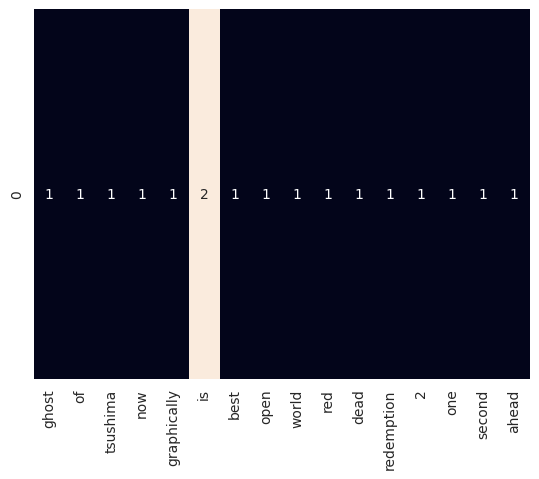

In [ ]:

words  = ['ghost','of','tsushima','now','graphically','is','best','open','world','red','dead','redemption','2','one','second','ahead']
counter_vectorizer = CountVectorizer()
transform = counter_vectorizer.fit_transform([test_text]).toarray()
sns.heatmap(transform, annot=True,xticklabels=words,
        cbar=False)
transform

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**TF-IDF:**<br>

Tf_IDF : Actually , TF-IDF is composed of two parts.Firtsly , Tf which stands for Term Frequancy is how many times a word appears in a document.<br>
(counting the number of words and divide it to the number of all words in the sentence)<br>

IDF : which stands for Inverse Document Frequancy , is how common a word is found in a corpus or how uncommon a word is found in a corpus.<br>
(measure of how important a term is across all documents in the corpus)<br>
Result is actually a number between 0 and 1 , It is calculated by taking the logarithm of the total number of documents in the corpus divided<br>
by number the of documents in which the term appears<br>

However , it can not be a perfect manner to show just a single example to describe TF-IDF , but I will show it for better understanding <br>


</div>

array([[0.22941573, 0.22941573, 0.22941573, 0.22941573, 0.22941573,
        0.45883147, 0.22941573, 0.22941573, 0.22941573, 0.22941573,
        0.22941573, 0.22941573, 0.22941573, 0.22941573, 0.22941573,
        0.22941573]])

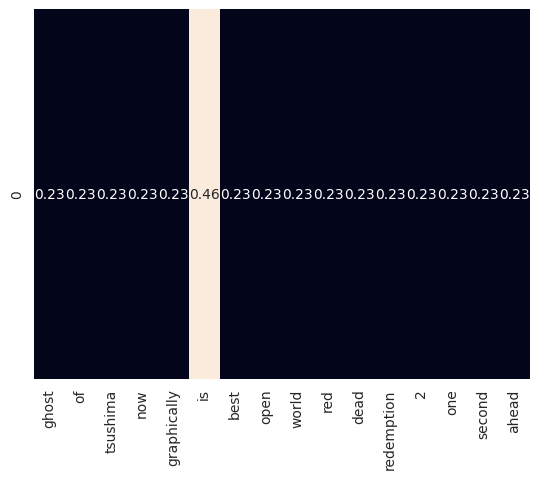

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
words  = ['ghost','of','tsushima','now','graphically','is','best','open','world','red','dead','redemption','2','one','second','ahead']
TF_IDF = TfidfVectorizer()
transform = TF_IDF.fit_transform([test_text]).toarray()
sns.heatmap(transform, annot=True,xticklabels=words,
        cbar=False)
transform

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**N-grams:**<br>

In a nutshell , N-gram means a sequence of N words.a collection of n successive items in a text document that may include words, numbers, symbols,<br>  and punctuation.If 2 , it is based on just the word and the next word after that.3 grams , itself and with 2 words after that and so on. <br>

</div>

N-grams => 3-grams

In [ ]:
def n_grams(text, n):

    return [text[i:i+n] for i in range(len(text)-n+1)]
cleaned = test_text_tokenized
n_grams(cleaned, 3)


[['ghost', 'of', 'tsushima'],
 ['of', 'tsushima', 'is'],
 ['tsushima', 'is', 'now'],
 ['is', 'now', 'graphically'],
 ['now', 'graphically', 'the'],
 ['graphically', 'the', 'best'],
 ['the', 'best', 'open'],
 ['best', 'open', 'world'],
 ['open', 'world', 'red'],
 ['world', 'red', 'dead'],
 ['red', 'dead', 'redemption'],
 ['dead', 'redemption', '2'],
 ['redemption', '2', 'is'],
 ['2', 'is', 'one'],
 ['is', 'one', 'second'],
 ['one', 'second', 'ahead']]

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Stop words:**<br>

Stop words are words which are very common in a language. In many projects , they are deleted because they can not affect and they <br>
can easily increase the volume of texts without any assistance.<br>

Actually , there is a package which contains all stopwords(in NLTK library) in English which are commonly used for NLP projects.<br>
First we have to determine our language and download the words for that language.<br>
As you can see , there are 179 stopwords in English and I have shown 20 of them .


</div>

In [ ]:
import nltk
nltk.download('stopwords')
stopwords_list = stopwords.words('english')
print(f'There are {len(stopwords_list) } stop words')
print('**' * 20 , '\n20 of them are as follows:\n')
for inx , value in enumerate(stopwords_list[:20]):
    print(f'{inx+1}:{value}')


There are 179 stop words
**************************************** 
20 of them are as follows:

1:i
2:me
3:my
4:myself
5:we
6:our
7:ours
8:ourselves
9:you
10:you're
11:you've
12:you'll
13:you'd
14:your
15:yours
16:yourself
17:yourselves
18:he
19:him
20:his


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Punctuation count**<br>

Now I want to show what punctuations are mostly used in each Mode of views.First, I create a function to read words of each sample for each <br>
Mode and then using defaultdict to count each stop words which exists in the whole samples.Using sorted to adjust them with highest one to lowest<br>
(for 10 most commons , I have used Bar chart to depict)<br>

You can see that , (the , to , and , a) are come the same amount in each Mode with same distribution respectively .
</div>

In [ ]:
def make_corpus(kind):
    corpus = []
    for text in df.loc[df['Mode']==kind]['Text'].str.split():
        for word in text:
            corpus.append(word)
    return corpus

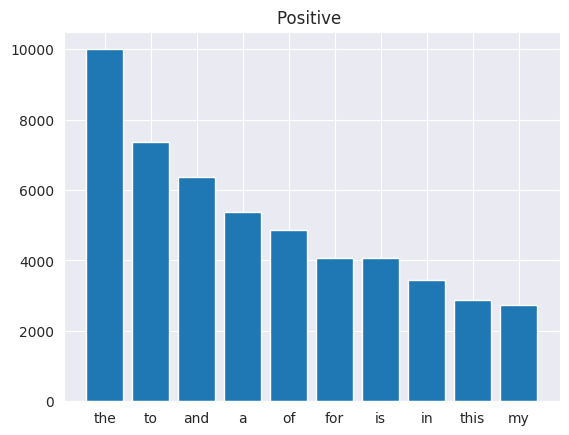

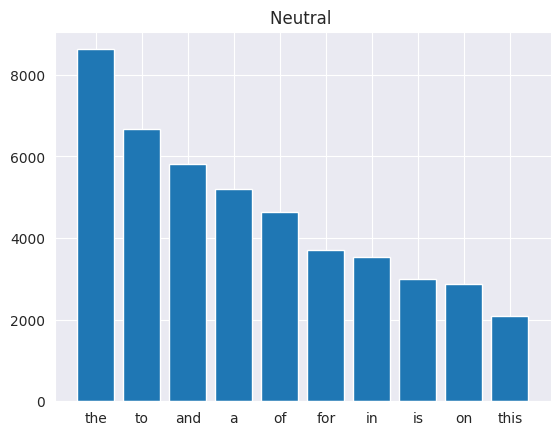

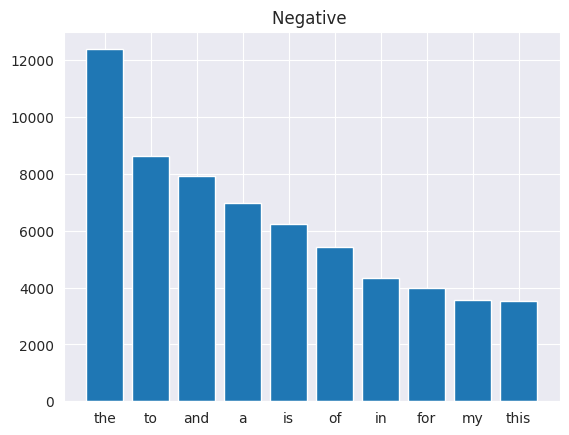

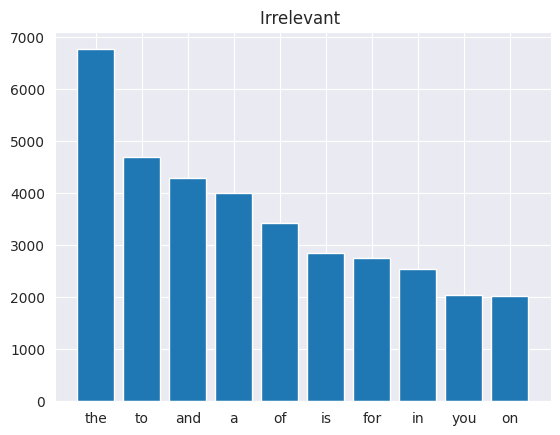

CPU times: user 5 s, sys: 400 ms, total: 5.4 s
Wall time: 5.93 s


In [ ]:
%%time
stop = stopwords.words('english')
sentiments = list(df.Mode.unique())



for inx , value in enumerate(sentiments):

    corpus = make_corpus(value)

    dic = defaultdict(int)

    for word in corpus:
        if word in stop:
            dic[word] += 1

    top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:10]

    x, y = zip(*top)
    plt.title(f'{value} ')
    plt.bar(x , y)
    plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Descripton**<br>

Here , I just do the previous techniques on the dataset to prepare them for the next steps.<br>
clear them with text_clearer , and tokenize them .
</div>

In [ ]:
# df['Text'] = df['Text'].apply(lambda x : clean_emoji(x))
df['Text'] = df['Text'].apply(lambda x : text_cleaner(x))
df['Text']= df['Text'].apply(lambda x : Tokenizer.tokenize(x))
df['Text'].to_frame()


,Text
0,"[i, am, coming, to, the, borders, and, i, will..."
1,"[im, getting, on, borderlands, and, i, will, k..."
2,"[im, coming, on, borderlands, and, i, will, mu..."
3,"[im, getting, on, borderlands, 2, and, i, will..."
4,"[im, getting, into, borderlands, and, i, can, ..."
...,...
74676,"[just, realized, that, the, windows, partition..."
74677,"[just, realized, that, my, mac, window, partit..."
74678,"[just, realized, the, windows, partition, of, ..."
74679,"[just, realized, between, the, windows, partit..."


Lemmas and Stems

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Lemmatization :**<br>

Lemmatization is a text pre-processing technique used in natural language processing (NLP) models to break a word down to its root meaning to <br>
identify similarities. For example, a lemmatization algorithm would reduce the word better to its root word, or lemme, good. <br>

**Stemming :**<br>
Stemming is a natural language processing technique that is used to reduce words to their base form, also known as the root form.The word <br>
after stemming is called stem of that word. <br>

**Difference :**<br>
The most important different between Lemmatization and  stemming  is that , Lemmatization is more accurate and it brings a word to the <br>
language root of that word and stemming can be anything which means for computer and is not readable for humans(sometimes not readable)<br>
However , stemming is also faster and is a great way for huge corpus.

**Sample**:<br>
In the example I have shown the lemma of each word

**Dataset**<br>
for the all dataset , we can afford either , which I have commented lemmatization method , if we want Lemmatization we can uncomment it and use<br>
instead of stemming technique.

**Note**<br>
In the following code , before stemming , we are deleting all stopwords from each sample and then afford its stemmig for each word.
</div>

In [ ]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(test_text)
for token in doc :
    print(f'{token} => {token.lemma_}')

ghost => ghost
of => of
tsushima => tsushima
is => be
now => now
graphically => graphically
the => the
best => well
open => open
world => world
. => .
red => red
dead => dead
redemption => redemption
2 => 2
is => be
one => one
second => second
ahead => ahead
. => .


In [ ]:
# lemmatizer = WordNetLemmatizer()
Stemmer = PorterStemmer()
def stopwords_cleaner(text):
#     word = [lemmatizer.lemmatize(letter) for letter in text if letter not in stopwords_list]
    word = [Stemmer.stem(letter) for letter in text if letter not in stopwords_list]
    peasting = ' '.join(word)
    return peasting
df['Text'] = df['Text'].apply(lambda x : stopwords_cleaner(x))
# stopwords_cleaner(Tokenizer.tokenize(df.Text[100]))

In [ ]:
df['Text'][:10].to_frame()

,Text
0,come border kill
1,im get borderland kill
2,im come borderland murder
3,im get borderland 2 murder
4,im get borderland murder
5,spent hour make someth fun know huge borderlan...
6,spent coupl hour someth fun know huge borderla...
7,spent hour someth fun know huge borderland fan...
8,spent hour make someth fun know huge rhandlerr...
9,2010 spent hour make someth fun know huge rhan...


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**WordCloud**<br>

word Cloud is just a data visualization technique used for representing text data in which the size of each word indicates its frequency or <br>  importance.Now , I will show the most important words(common ones) exclude stopwords for each Mode.<br>

</div>

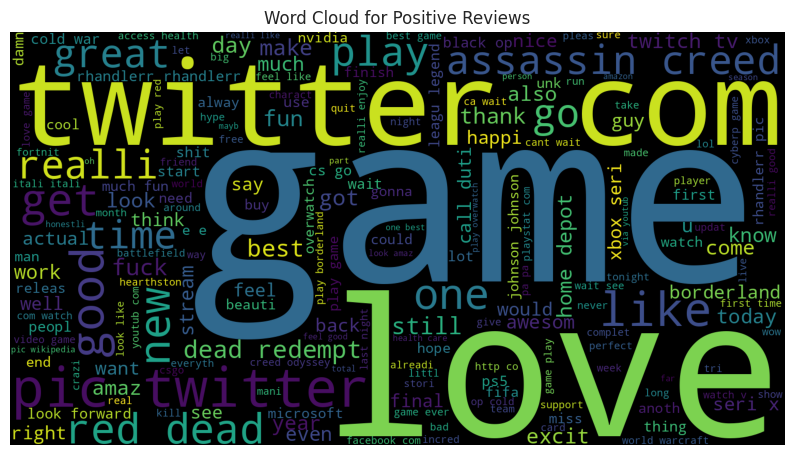

In [ ]:
%%time
positive_reviews = df[df['Mode'] == 'Positive']['Text']
pos = ' '.join(map(str, positive_reviews))
pos_wordcloud = WordCloud(width=1500, height=800,
                          background_color='black',
                         stopwords=stopwords_list,
                          min_font_size=15).generate(pos)
plt.figure(figsize=(10, 10))
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()


CPU times: user 3.18 s, sys: 223 ms, total: 3.4 s
Wall time: 3.32 s


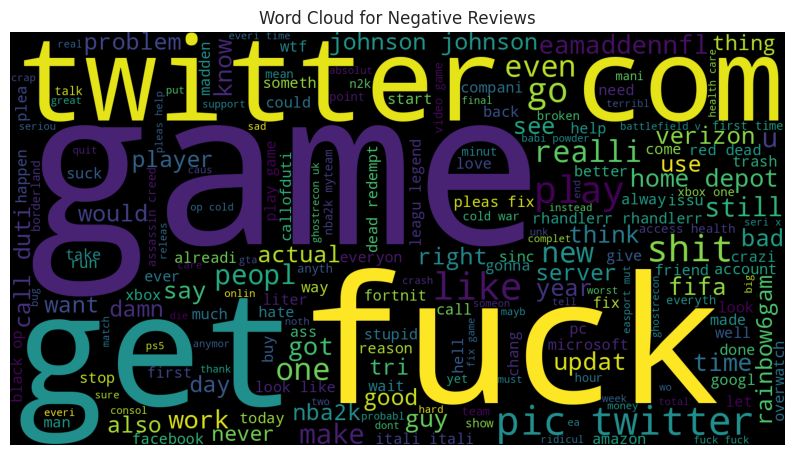

CPU times: user 3.59 s, sys: 223 ms, total: 3.81 s
Wall time: 4.17 s


In [ ]:
%%time
positive_reviews = df[df['Mode'] == 'Negative']['Text']
neg = ' '.join(map(str, positive_reviews))
pos_wordcloud = WordCloud(width=1500, height=800,
                          background_color='black',
                         stopwords=stopwords_list,
                          min_font_size=15).generate(neg)
plt.figure(figsize=(10, 10))
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()

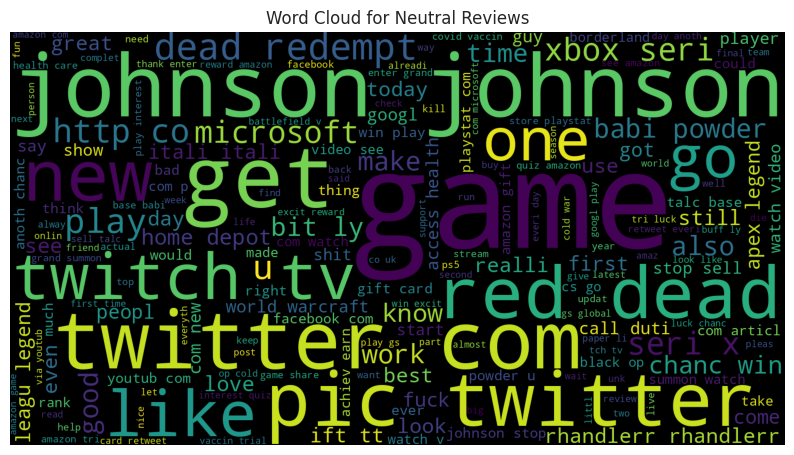

CPU times: user 3.55 s, sys: 152 ms, total: 3.71 s
Wall time: 4.06 s


In [ ]:
%%time
positive_reviews = df[df['Mode'] == 'Neutral']['Text']
Neutral = ' '.join(map(str, positive_reviews))
pos_wordcloud = WordCloud(width=1500, height=800,
                          background_color='black',
                         stopwords=stopwords_list,
                          min_font_size=15).generate(Neutral)
plt.figure(figsize=(10, 10))
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for Neutral Reviews')
plt.axis('off')
plt.show()

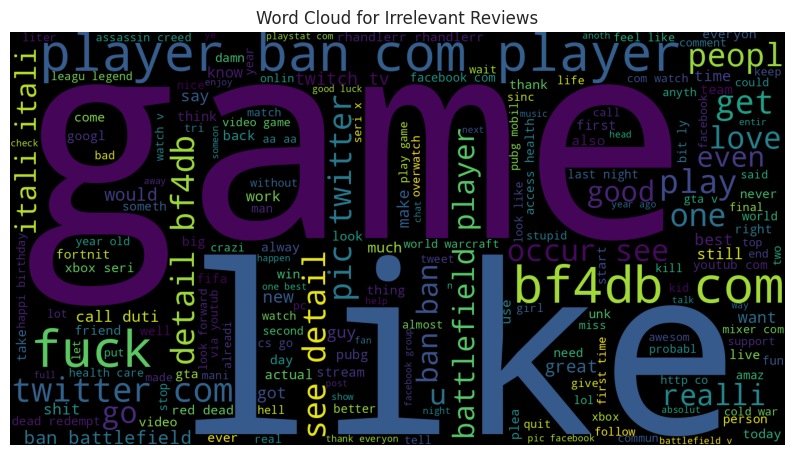

CPU times: user 3.33 s, sys: 223 ms, total: 3.55 s
Wall time: 3.99 s


In [ ]:
%%time
positive_reviews = df[df['Mode'] == 'Irrelevant']['Text']
Irrelevant  = ' '.join(map(str, positive_reviews))
pos_wordcloud = WordCloud(width=1500, height=800,
                          background_color='black',
                         stopwords=stopwords_list,
                          min_font_size=15).generate(Irrelevant )
plt.figure(figsize=(10, 10))
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for Irrelevant Reviews')
plt.axis('off')
plt.show()


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Descripton**<br>
A number of fundamental statistics are shown below to know about corpus .such as , maximum , minimum length of texts , <br>
mean of length , std and the last calculation which is momentous is the number of words which we are required to have for each sample <br>
we should not allow all words of each sample be in the review).For example, someone has a review with 797 words. so it is computiationally expensive and furthermore , it dosent allow our model to learn perfectly.Instead of all words , we are going to use a formula to keep 95% of data , but <br>
with a samller amount of data for learning better and instead of those additional words we use a special character namely PAD becuase all sample <br>
should have the same length. here , Mew + 2 sigma is 165.7 which we are going to use 166 words of each sample.
</div>

In [ ]:
len_text = [len(tx) for tx in df['Text'].to_list()]
print(f'Max Length : {np.max(len_text)}')
print(f'Min Length : {np.min(len_text)}')
print(f'Mean Length : {round(np.mean(len_text),2)}')
print(f'Std Length : {round(np.std(len_text),2)}')
print(f'Mew + 2sigma : {round(np.mean(len_text)+ 2 *np.std(len_text),2)}')


Max Length : 797
Min Length : 0
Mean Length : 67.68
Std Length : 49.01
Mew + 2sigma : 165.7


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Descripton**<br>

Now , after removing all stop words we want to see what words are most common for each mode in our corpus.Like wordcloud <br>
but in a barchart to have better insights. (either wordcloud or this way is enough for representing)

</div>

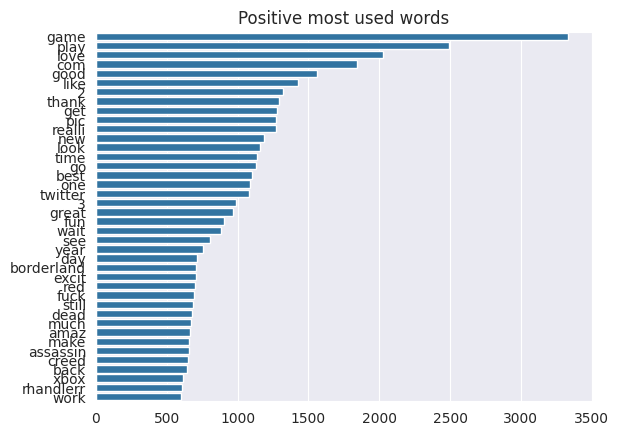

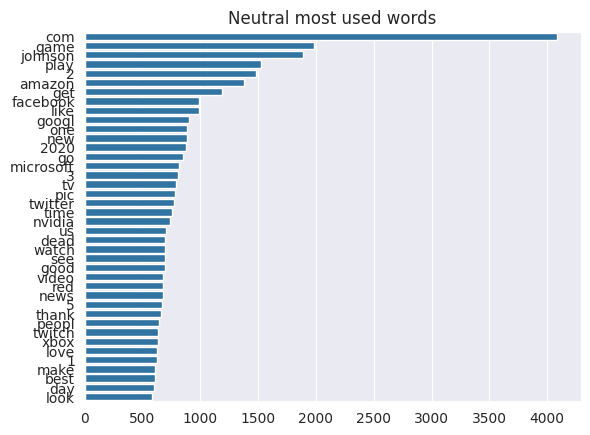

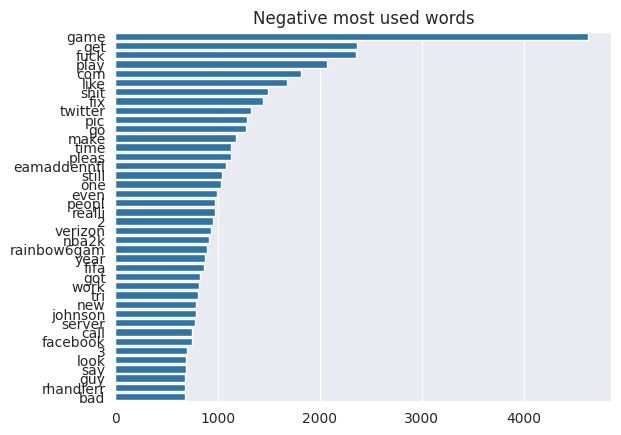

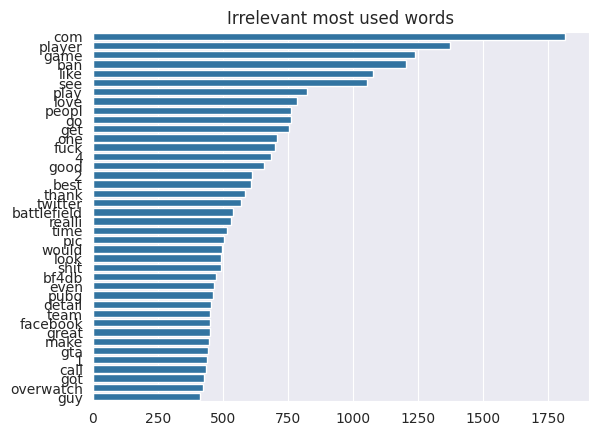

CPU times: user 3.07 s, sys: 366 ms, total: 3.43 s
Wall time: 3.52 s


In [ ]:
%%time
for inx , value in enumerate(sentiments):

    counter = Counter(make_corpus(value))
    most_common = counter.most_common()

    x = []
    y = []

    for word, count in most_common[:40]:
         if word not in stop:
            x.append(word)
            y.append(count)

    sns.barplot(x=y, y=x, orient='h')
    plt.title(f'{value} most used words')
    plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Descripton**<br>

we are going to create a column namely sentiments and instead of Positive , Negative we put 1 and 0 , instead of Neutral and <br>
Irrelevant we put 2. It means that underestanding Positive and Negative reviews is much more important for use rather that neutral and <br>
Irrelevant ones.(Just for decreasing the calsses and increasing the accuracy for finding Positive and Negative ones) however , we are able to<br>
 classify each one of them without mixing , but of curse the accuracy will decrease noticeably.<br>
</div>

In [ ]:
df['sentiments'] = df['Mode'].replace({'Positive' : 1 ,  'Negative' : 0 ,'Neutral':2 , 'Irrelevant' : 2 })

In [ ]:
df.sample(10)

,Index,Land,Mode,Text,sentiments
47741,5796,HomeDepot,Positive,took tio home depot get suppli someth broke ho...,1
51459,10433,RedDeadRedemption(RDR),Negative,smile though never wa sad enough alreadi thank...,0
66022,6906,johnson&johnson,Negative,nigger sound scari johnson johnson,0
31472,7404,LeagueOfLegends,Negative,riotgam leagueoflegend 13 time today role big ...,0
68763,3774,Cyberpunk2077,Irrelevant,serious head bunch two bad low life,2
59317,3367,Facebook,Irrelevant,react anoth job anli smith,2
46723,5617,HomeDepot,Negative,wife rel 2 take care tn live ga get 2b togeth ...,0
63549,7691,MaddenNFL,Negative,realli gonna make sick eamaddennfl,0
66754,7030,johnson&johnson,Negative,surpris trump keep make mistak man admit wrong...,0
16819,9683,PlayStation5(PS5),Neutral,store turmoil right arriv ps5 redesign someth ...,2


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Descripton**<br>
Now , we are going to create a customer class to show  len and item.
</div>

In [ ]:
class Dataset:
    def __init__(self,text,sentiment):
        self.text = text
        self.sentiment = sentiment

    def __len__(self):
        return len(self.text)

    def __getitem__(self,item):
        text = self.text[item,:]
        target = self.sentiment[item]
        return {
            "text": torch.tensor(text,dtype = torch.long),
            "target": torch.tensor(target,dtype = torch.long)
        }

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Descripton**<br>

We require helper functions to help us reading word vectors(we have a vord vector to give our model to understand the distant meaning of each words<br>
and by that we can improve our model accuracy. There are many word vectors whcih I will use glove.6B.300d 300 is the dimention.you can use less <br>
ones. More is better understanding but computationally higher.)and them another function to help us create embedding matrix for our corpus words.
</div>

In [ ]:
def load_vectors(fname):
    fin = open(fname , encoding="utf8")
    data = {}
    for line in fin:
        tokens = line.split()
        data[tokens[0]] = np.array([float(value) for value in tokens[1:]])

    return data

In [ ]:
def create_embedding_matrix(word_index,embedding_dict):

    embedding_matrix = np.zeros((len(word_index)+1,300))
    for word, i in word_index.items():
        if word in embedding_dict:
            embedding_matrix[i] = embedding_dict[word]

    return embedding_matrix

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Descripton**<br>
Creating our Model with the help of sentimentBiLSTM from nn.Module.Described each part in the code

</div>


<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Model </b></div>

<center>
<img src="https://miro.medium.com/v2/resize:fit:764/1*6QnPUSv_t9BY9Fv8_aLb-Q.png" width=800 height=500 />
</center>


Bidirectional LSTM (BiLSTM) is a recurrent neural network used primarily on natural language processing. Unlike standard LSTM, the input flows in both directions, and it’s capable of utilizing information from both sides. It’s also a powerful tool for modeling the sequential dependencies between words and phrases in both directions of the sequence.

In summary, BiLSTM adds one more LSTM layer, which reverses the direction of information flow. Briefly, it means that the input sequence flows backward in the additional LSTM layer. Then we combine the outputs from both LSTM layers in several ways, such as average, sum, multiplication, or concatenation.

In [ ]:
class sentimentBiLSTM(nn.Module):
#inherited from nn.Module

    def __init__(self, embedding_matrix, hidden_dim, output_size):

        #initializing the params by initialization method
        super(sentimentBiLSTM, self).__init__()
        self.embedding_matrix = embedding_matrix
        self.hidden_dim = hidden_dim
        num_words = self.embedding_matrix.shape[0]
        embed_dim = self.embedding_matrix.shape[1]
        # craetinh embedding layer
        self.embedding = nn.Embedding(num_embeddings=num_words,embedding_dim=embed_dim)

        ## initializes the weights of the embedding layer to the pretrained embeddings in
        ## embedding_matrix. It first converts embedding_matrix to a PyTorch tensor and
        ## wraps it in an nn.Parameter object, which makes it a learnable parameter of the model.
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix,dtype=torch.float32))
        self.embedding.weight.requires_grad = False
        self.lstm = nn.LSTM(embed_dim,hidden_dim,bidirectional=True,batch_first=True)

        #it is multuplied by 2 becuase it is bi_directional if one-sided it didnt need.
        self.fc = nn.Linear(hidden_dim*2, output_size)


    #we need a forward function to model calculate the cost and know how bad the params is .
    # However , it can be written in a line of code but if we want to track it it is easier way.
    def forward(self, x):


        embeds = self.embedding(x)
        lstm_out,_ = self.lstm(embeds)
        lstm_out = lstm_out[:, -1]
        out = self.fc(lstm_out)

        return out

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Descripton**<br>
spliting data to train and test => 80% for train and 20% for test

</div>

In [ ]:
y = df.sentiments.values
train_df,test_df = train_test_split(df,test_size = 0.2, stratify = y)

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Descripton**<br>
Max_length as mew + 2sigma = 167 <br>
Batch size is a number that detremined based on your system 16-32-64...<br>
Hidden_dimention for the model will be 64<br>
output is the number of classes which we have (len(classes))<br>
Also check if Cuda is available we put our system on GPU else CPU

</div>

In [ ]:
MAX_LEN = 167
BATCH_SIZE = 32
hidden_dim = 64
output_size = 3


if torch.cuda.is_available():

       device = torch.device("cuda")

else:
       device = torch.device("cpu")


print(f'Current device is {device}')


Current device is cuda


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Descripton**<br>
now , we need to convert each sample to a readable way and deleting all extra words more than 167 and put PAD character instead <br>
we use texts_to_sequences function to do that.and then using DataLoader to read data for both Train and Test.

</div>

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(df.Text.values.tolist())

xtrain = tokenizer.texts_to_sequences(train_df.Text.values)
xtest = tokenizer.texts_to_sequences(test_df.Text.values)
xtrain = tf.keras.preprocessing.sequence.pad_sequences(xtrain,maxlen = MAX_LEN)
xtest = tf.keras.preprocessing.sequence.pad_sequences(xtest,maxlen = MAX_LEN)
train_dataset = Dataset(text=xtrain,sentiment=train_df.sentiments.values)
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=BATCH_SIZE,drop_last=True)
valid_dataset = Dataset(text=xtest,sentiment=test_df.sentiments.values)
valid_loader = torch.utils.data.DataLoader(valid_dataset,batch_size=BATCH_SIZE,drop_last=True)


In [ ]:
# check a batch of data
one_batch = next(iter(train_loader))
one_batch

{'text': tensor([[    0,     0,     0,  ...,    22,    32,   395],
         [    0,     0,     0,  ...,   876,   126,   160],
         [    0,     0,     0,  ...,   679, 14517, 14518],
         ...,
         [    0,     0,     0,  ...,    15,   120,   777],
         [    0,     0,     0,  ...,  2116,  1881,   278],
         [    0,     0,     0,  ...,  2409,   244,   380]]),
 'target': tensor([0, 1, 2, 2, 0, 1, 1, 2, 2, 1, 0, 2, 0, 2, 2, 0, 1, 0, 0, 2, 2, 1, 2, 2,
         1, 0, 2, 2, 0, 0, 1, 2])}

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Descripton**<br>
As I said , we need a word vector (glove.6B.300d) which Im using and now load it and tokenize it

</div>

In [ ]:
embedding_dict = load_vectors('/kaggle/input/glove6b300dtxt/glove.6B.300d.txt')
embedding_matrix = create_embedding_matrix(tokenizer.word_index,embedding_dict)

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Descripton**<br>
Now create a object of the model (embedding_matrix, hidden_dim=64, output_size=3) and put the model on device.

</div>

In [ ]:
model = sentimentBiLSTM(embedding_matrix ,  hidden_dim, output_size)
model = model.to(device)
print(model)

sentimentBiLSTM(
  (embedding): Embedding(23595, 300)
  (lstm): LSTM(300, 64, batch_first=True, bidirectional=True)
  (fc): Linear(in_features=128, out_features=3, bias=True)
)


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Descripton**<br>
manual_seed : for reproductivity<br>
Optimizer : can be either SGD and Adam or any others . But I prefer Adam as defualt. with lr = 0.001<br>
cost_function = CrossEntropyLoss() cause we have 3 classes => BCELoss() if it was just 2 <br>
schedul_learning: also we can use a schedul_learning to decrease the lr after a number of epochs but I tried and i didnt go well<br>
acc : acc function is used  to show the accuray<br>
The number of epochs will be = 9
</div>

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

optimizer = optim.Adam(model.parameters(), lr=0.001)

criterion = nn.CrossEntropyLoss()
# schedul_learning = torch.optim.lr_scheduler.MultiStepLR(optimizer=optimizer , milestones=[6] ,
#                                                         gamma=0.055)

def acc(pred,label):
    pred = pred.argmax(1)
    return torch.sum(pred == label.squeeze()).item()

In [ ]:
clip = 5
epochs = 9
valid_loss_min = np.Inf
# train for some number of epochs
epoch_tr_loss,epoch_vl_loss = [],[]
epoch_tr_acc,epoch_vl_acc = [],[]

for epoch in range(epochs):
    # for getting loss and accuracy for train
    train_losses = []
    train_acc = 0.0

    #put model on train mode
    model.train()
    correct = 0

    # initialize hidden state
    for data in train_loader:

        #get text and target
        inputs = data['text']
        labels = data['target']

        #put them on GPU and right dtypes
        inputs = inputs.to(device,dtype=torch.long)
        labels = labels.to(device,dtype=torch.float)

         #gradient becomes zero=> avoid accumulating
        model.zero_grad()
        output = model(inputs)
          # calculate the loss and perform backprop
        loss = criterion(output, labels.long())
        loss.backward()
        train_losses.append(loss.item())
        # accuracy
        accuracy = acc(output,labels)
        train_acc += accuracy
        #`clip_grad_norm` helps prevent the exploding gradient problem in LSTMs
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()

    # for getting loss and accuracy for valiadtion
    val_losses = []
    val_acc = 0.0

    #put model on evaluation mode
    model.eval()
    for data in valid_loader:

        #get text and target
        inputs = data['text']
        labels = data['target']

        #put them on GPU and right dtypes
        inputs = inputs.to(device,dtype=torch.long)
        labels = labels.to(device,dtype=torch.float)

        #gradient becomes zero=> avoid accumulating
        model.zero_grad()
        output = model(inputs)

        output = model(inputs)
        #Loss calculating
        val_loss = criterion(output, labels.long())
        #append Loss to the above list
        val_losses.append(val_loss.item())

        # calculating accuracy
        accuracy = acc(output,labels)
        val_acc += accuracy
        epoch_train_loss = np.mean(train_losses)

        #using schedule lr if you need
#         schedul_learning.step()
#         schedul_learning

    #appending all accuracy and loss to the above lists and variables
    epoch_val_loss = np.mean(val_losses)
    epoch_train_acc = train_acc/len(train_loader.dataset)
    epoch_val_acc = val_acc/len(valid_loader.dataset)
    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)
    print(f'Epoch {epoch+1}')
    print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
    print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')
    if epoch_val_loss <= valid_loss_min:
        #each time that model(params) get better you can save the model(you have to enter a path ou you pc and save with pt file)
        # torch.save(model.state_dict(), r'C:\Users\payama\Desktop\Projects kaggle\NLP\vectors features\BidirectionalLSTM.pt')
#         print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
        print(f'Validation loss decreased ({valid_loss_min} --> {epoch_val_loss})  Saving model ...')
        # save model if better result happends
        valid_loss_min = epoch_val_loss
    print(30 * '==' , '>')

Epoch 1
train_loss : 0.8597319540466296 val_loss : 0.766096396467563
train_accuracy : 59.58760728490684 val_accuracy : 65.68278556974391
Validation loss decreased (inf --> 0.766096396467563)  Saving model ...
============================================================ >
Epoch 2
train_loss : 0.6688625403185386 val_loss : 0.6513973949872941
train_accuracy : 70.86211708882841 val_accuracy : 72.07452375968181
Validation loss decreased (0.766096396467563 --> 0.6513973949872941)  Saving model ...
============================================================ >
Epoch 3
train_loss : 0.519301541078896 val_loss : 0.5783733944564857
train_accuracy : 78.3964831484195 val_accuracy : 76.10076058893308
Validation loss decreased (0.6513973949872941 --> 0.5783733944564857)  Saving model ...
============================================================ >
Epoch 4
train_loss : 0.4071716630819921 val_loss : 0.529102868681786
train_accuracy : 83.574070197474 val_accuracy : 78.91284627730096
Validation loss de

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Descripton**<br>
    
The result after 10 epochs is :<br>
    
train_accuracy : 89.26278696531995 <br>
val_accuracy : 81.20159095666737<br>
    
train_loss : 0.27417723412481454<br>
val_loss : 0.5044464878321228<br>  


Lets plot it for better understanding =>
</div>

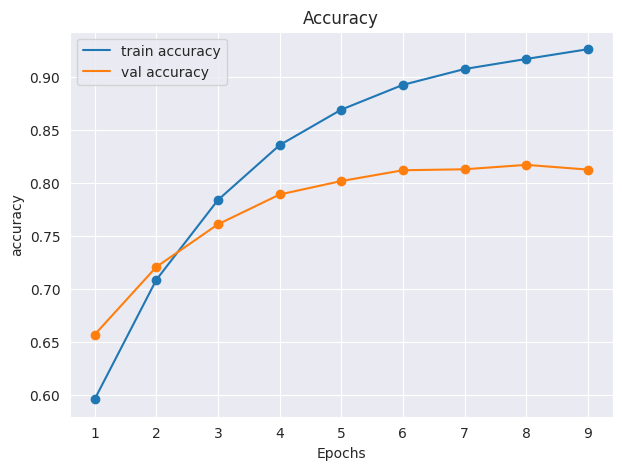

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(range(1,10),epoch_tr_acc , label='train accuracy')
plt.scatter(range(1,10),epoch_tr_acc)
plt.plot(range(1,10),epoch_vl_acc , label='val accuracy')
plt.scatter(range(1,10),epoch_vl_acc)
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

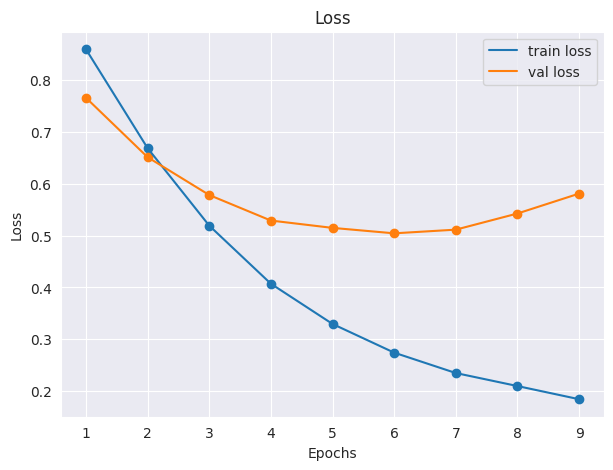

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(range(1,10),epoch_tr_loss , label='train loss')
plt.scatter(range(1,10),epoch_tr_loss )
plt.plot(range(1,10),epoch_vl_loss , label='val loss')
plt.scatter(range(1,10),epoch_vl_loss)
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> End </b></div>